In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Vizianagaram']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3744,3747,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,8.46,0.24,0.19,...,0.25,13.79,1.39,6.48,0.604339,0.455705,0.635263,2.279320,-0.532636,Blackgram
3745,3748,18.76,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Sandy,4.85,0.03,0.11,...,0.13,26.18,0.56,27.57,0.491363,0.335857,0.602591,1.612587,-0.446380,Sandy
3746,3749,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.15,0.15,0.65,...,0.31,61.89,2.58,17.93,0.604339,0.455705,0.635263,2.279320,-0.532636,Paddy
3747,3750,18.76,83.30,Vizianagaram,Parvathipuram,Challam Valasa,Black,5.62,0.09,0.70,...,0.38,110.16,3.16,16.98,0.504809,0.362128,0.747147,1.599631,-0.444387,Paddy
3748,3751,18.75,83.32,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.86,0.30,0.89,...,0.70,84.45,4.05,47.29,0.678606,0.544107,0.840633,2.761378,-0.579954,Blackgram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,6.763747,0.291120,0.482342,11.691874,127.775967,1216.181263,300.458248,16.410978,0.880265,0.969328,46.068758,2.190916,33.159002,0.413288
std,1.175368,0.527502,0.187164,11.915978,94.141766,745.193780,204.656147,24.794001,0.796994,0.715113,42.332614,1.178898,24.745429,0.183219
min,4.770000,0.020000,0.030000,1.240000,12.000000,74.000000,10.000000,0.240000,0.120000,0.130000,2.180000,0.300000,3.150000,0.074499
25%,5.635000,0.090000,0.360000,4.095000,70.500000,660.000000,134.500000,5.175000,0.470000,0.415000,12.450000,1.220000,15.880000,0.249393
50%,6.830000,0.170000,0.470000,6.670000,108.000000,1066.000000,260.000000,9.870000,0.680000,0.680000,30.520000,2.000000,27.570000,0.440109
75%,7.850000,0.300000,0.600000,14.810000,149.500000,1613.500000,429.000000,18.895000,0.970000,1.405000,70.660000,2.975000,40.355000,0.532047
max,9.500000,8.500000,1.310000,85.240000,809.000000,4246.000000,1308.000000,328.670000,7.320000,3.740000,236.900000,7.290000,163.030000,0.765930


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Sandy', 'Red', 'Sandy Loam', 'Loam', 'White',
       'Sandyloam', 'Red Sandy', 'Sandy ', 'Black ', 'Sand',
       'Sandy Loam ', 'Cashewnut'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy', 'Sandy ', 'Sand', 'Red Sandy'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Loam ', 'Sandyloam', 'Sandy Loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Loam', 'Loam Soil')
df = df[(df["SoilType"] != 'Cashewnut') & (df["SoilType"] != 'White')]
df.SoilType.unique()

array(['Black Soil', 'Sandy Soil', 'Red Soil', 'Sandy Loam Soil',
       'Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 149,
 'Sandy Loam Soil': 145,
 'Black Soil': 107,
 'Sandy Soil': 71,
 'Loam Soil': 17}

<BarContainer object of 5 artists>

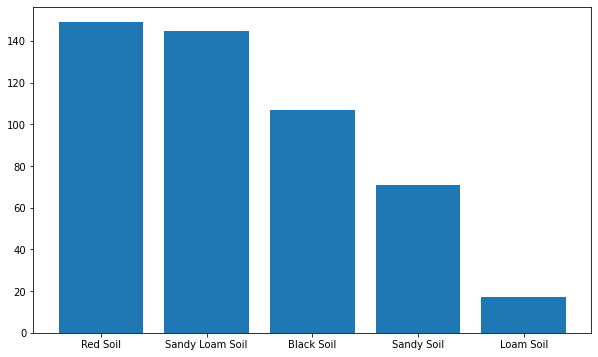

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Blackgram', 'Sandy', 'Paddy', 'Sesumum', 'Sesamum', 'Maize',
       'Black Gram', 'Mango', 'Eucaliptus', 'Cashewnut', 'Ragi',
       'Mango(Intercrop Ragi,)', 'Cashew Nut', 'Mango(Intercrop Ragi)',
       'Mango(Inter Crop Ragi)', 'Red Gram',
       'Mango (Inter Crop Red Gram And Ragi)', 'Oil Palm', 'Mesta',
       'Cashewnut, Mango (Intercrop Maize And Seasamum)', 'Paady',
       'Chilli', 'Sugarcane', 'Banana', 'Coconut', 'Ground Nut', ' Maize',
       'Coconut (Intercop Maize)', 'Cashew Raina', 'Mc', 'Cotton'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                                              176
Maize                                              172
Sesamum                                             43
Coconut                                             26
Blackgram                                           13
Cashew Nut                                           8
Banana                                               7
Mango                                                6
Cashewnut                                            6
Ragi                                                 4
Paady                                                3
Mesta                                                3
Oil Palm                                             2
Ground Nut                                           2
Mango(Inter Crop Ragi)                               2
Sesumum                                              1
Cashewnut, Mango (Intercrop Maize And Seasamum)      1
Red Gram                                             1
Mango (Int

Paddy        179
Maize        173
Sesamum       44
Coconut       27
CashewNut     15
BlackGram     14
Mango         12
Name: Crop, dtype: int64


<BarContainer object of 7 artists>

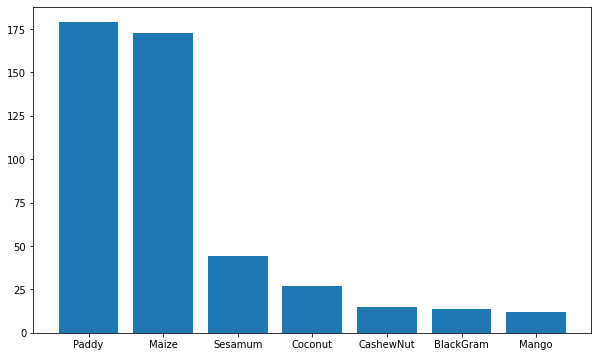

In [15]:
df['Crop'] = df['Crop'].replace(['Blackgram', 'Black Gram'], 'BlackGram')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Sesumum', 'Sesamum')
df['Crop'] = df['Crop'].replace(' Maize', 'Maize')
df['Crop'] = df['Crop'].replace(['Mango(Intercrop Ragi)', 'Mango(Intercrop Ragi,)', 'Mango(Inter Crop Ragi)', 'Mango (Inter Crop Red Gram And Ragi)', 'Cashewnut, Mango (Intercrop Maize And Seasamum)'], 'Mango')
df['Crop'] = df['Crop'].replace(['Cashewnut', 'Cashew Nut', 'Cashew Raina'], 'CashewNut')
df['Crop'] = df['Crop'].replace('Coconut (Intercop Maize)', 'Coconut')
df = df[(df['Crop'] != 'Sandy') & (df['Crop'] != 'Eucaliptus') & (df['Crop'] != 'Mc') & (df['Crop'] != 'Mesta') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Red Gram') & (df['Crop'] != 'Oil Palm') & (df['Crop'] != 'Ragi') & (df['Crop'] != 'Sugarcane') & (df['Crop'] != 'Cotton') & (df['Crop'] != 'Ground Nut')]
df = df[df['Crop'] != 'Banana']

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
pH,1.000000,0.281542,0.035015,0.398014,0.317697,0.545172,0.674187,0.252758,0.186213,0.669005,-0.669751,-0.246604,-0.343555,-0.419495
EC,0.281542,1.000000,0.235520,0.346411,0.304910,0.243800,0.491103,0.846380,0.314124,0.349722,-0.146395,0.048183,-0.054909,-0.315096
OC,0.035015,0.235520,1.000000,0.193455,0.228135,0.422226,0.363388,0.354167,0.273680,0.292924,0.337670,0.696471,0.062055,0.075545
P,0.398014,0.346411,0.193455,1.000000,0.463098,0.172051,0.389330,0.380022,0.612654,0.477513,-0.123186,-0.011556,-0.109731,-0.289995
K,0.317697,0.304910,0.228135,0.463098,1.000000,0.266066,0.345684,0.280814,0.352003,0.335616,-0.248655,-0.081370,0.065889,-0.256663
Ca,0.545172,0.243800,0.422226,0.172051,0.266066,1.000000,0.779671,0.307892,0.024606,0.458529,-0.174735,0.284958,-0.212633,-0.091174
Mg,0.674187,0.491103,0.363388,0.389330,0.345684,0.779671,1.000000,0.478890,0.139498,0.739764,-0.319765,0.154586,-0.228722,-0.352615
S,0.252758,0.846380,0.354167,0.380022,0.280814,0.307892,0.478890,1.000000,0.301916,0.400227,-0.029385,0.196379,-0.060452,-0.226769
Zn,0.186213,0.314124,0.273680,0.612654,0.352003,0.024606,0.139498,0.301916,1.000000,0.173359,-0.006438,0.089369,0.105286,-0.167679
B,0.669005,0.349722,0.292924,0.477513,0.335616,0.458529,0.739764,0.400227,0.173359,1.000000,-0.330251,0.070365,-0.320651,-0.378426


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Fe', 'Mn', 'NDVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P      K     Fe    Mn      NDVI  Black Soil  \
3744  8.46  0.24  0.19  2.41  134.0  13.79  6.48  0.604339           1   

      Loam Soil  Red Soil  Sandy Loam Soil  Sandy Soil  
3744          0         0                0           0  
3744    BlackGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:8] = sc1.fit_transform(X[:, 0:8])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7611464968152867


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.15 %
Standard Deviation: 2.66 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7707006369426752


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.02 %
Standard Deviation: 3.67 %


# Random Forest Classifier

In [35]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8471337579617835


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.33 %
Standard Deviation: 2.75 %


In [39]:
pickle.dump(clf3_3, open('Vizianagaram_model.pkl', 'wb'))
pickle.dump(sc2, open('Vizianagaram_scaler.pkl', 'wb'))

# XGBoost

In [40]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8503184713375797


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.64 %
Standard Deviation: 3.13 %


# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.858359957401491
Testing Accuracy:  0.7738853503184714


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.24 %
Standard Deviation: 3.88 %


# Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))